Let's Grow More - Data Science Intern

LGMVIP November 2023

Beginner Level Task

Task 2 : Stock Market Prediction and Forecasting using stacked LSTM

Saachi Bhimanpalli

In [184]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
from sklearn.metrics import mean_squared_error

In [185]:
dataset='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [186]:
df= pd.read_csv(dataset, parse_dates=True)
df.reset_index()
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [187]:
df.sample(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
720,2015-11-02,134.00,135.00,130.95,132.60,132.65,621684,822.29
614,2016-04-07,118.10,120.40,118.10,118.40,118.70,1147382,1370.59
1710,2011-11-04,91.60,92.05,90.70,91.15,90.95,628106,573.39
1396,2013-02-05,145.00,145.00,139.50,141.55,141.50,2825282,4006.83
1673,2011-12-30,91.00,91.65,89.60,90.35,90.10,687835,624.90
842,2015-05-08,139.00,141.85,138.30,140.95,141.05,1572681,2211.64
1136,2014-02-19,140.35,141.75,139.60,140.25,140.35,882447,1241.11
1935,2010-12-09,115.90,115.90,110.20,111.40,111.50,1285356,1454.58
818,2015-06-11,137.00,137.75,133.60,133.90,134.40,1586596,2149.62
1674,2011-12-29,86.85,90.80,86.70,90.05,90.10,1168213,1039.69


In [188]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [189]:
df.shape

(2035, 8)

In [190]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                

In [191]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [192]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [193]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [194]:
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [195]:
df['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

<Axes: >

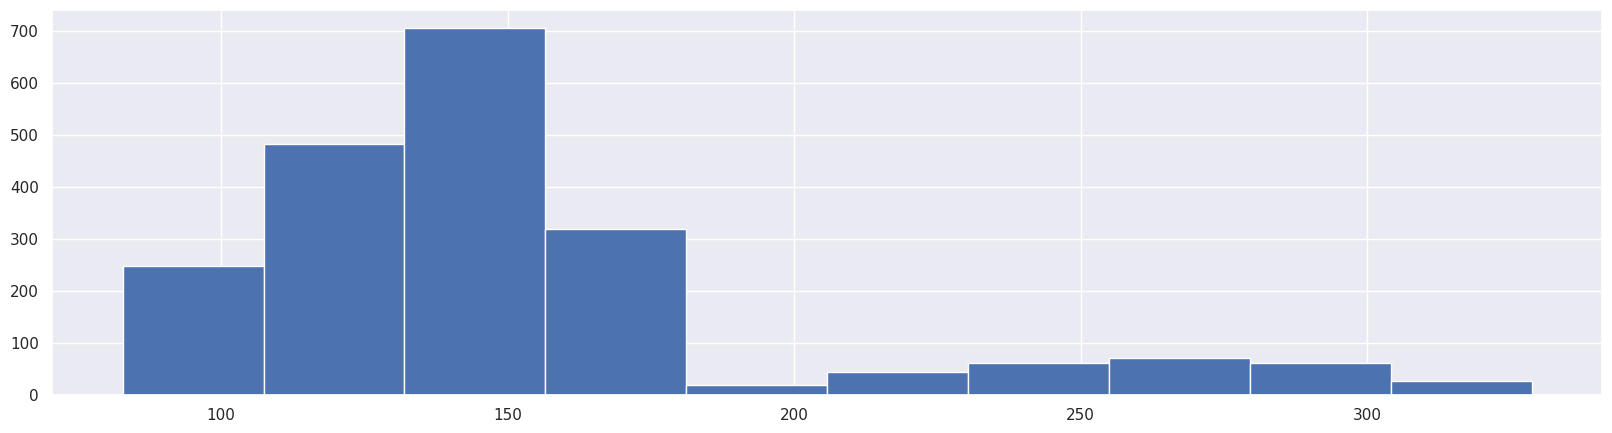

In [196]:
df['High'].hist()

<Axes: >

<Figure size 2000x800 with 0 Axes>

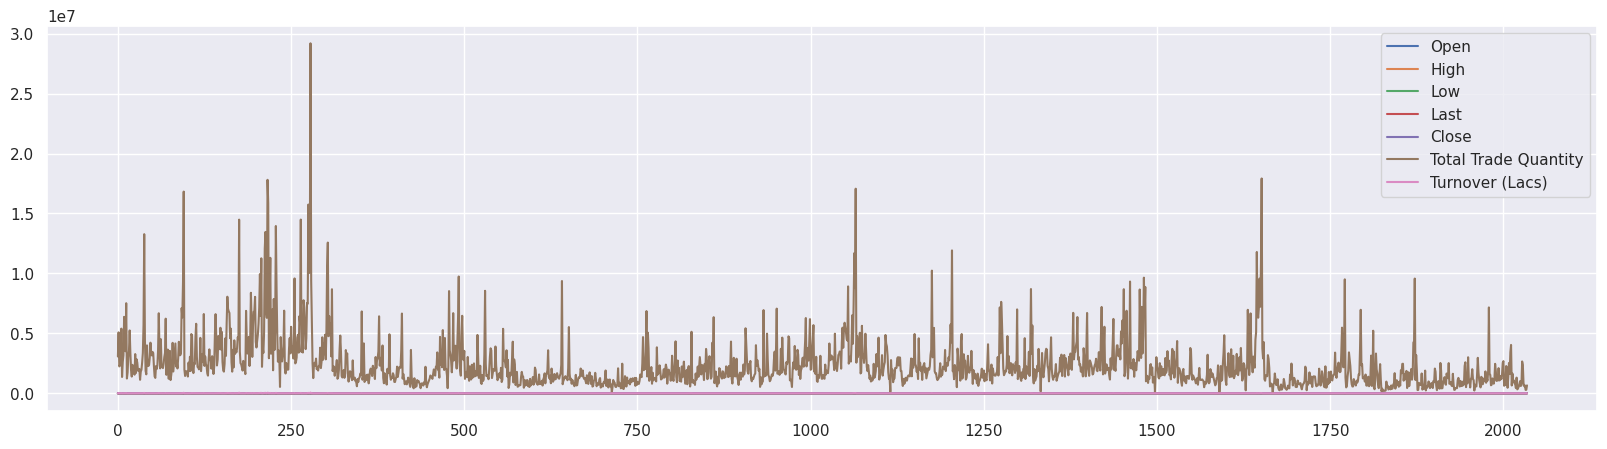

In [197]:
plt.figure(figsize=(20,8))
df.plot()

In [198]:
data_set = df.filter(['Close'])
Dataset = df.values
lengthoftrainingdata=math.ceil(len(df) * 8)
lengthoftrainingdata

16280

In [199]:
Dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [200]:
df = df.iloc[:, 0:5]
df

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [201]:
training_set = df.iloc[:, 1:2].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [202]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaledtrainingdata = scaler.fit_transform(training_set)


In [203]:
setoffeatures = []
labels = []
for i in range(60, 586):
  setoffeatures.append(scaledtrainingdata[i - 60:i, 0])
  labels.append(scaledtrainingdata[i, 0])

In [204]:
setoffeatures, labels = np.array(setoffeatures), np.array(labels)

In [205]:
setoffeatures = np.reshape(setoffeatures, (setoffeatures.shape[0], setoffeatures.shape[1], 1))
setoffeatures.shape

(526, 60, 1)

In [206]:
model = Sequential()

In [207]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [208]:
model.fit(setoffeatures, labels, epochs=75, batch_size=25)

Epoch 1/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1279
Epoch 2/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1255
Epoch 3/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1297
Epoch 4/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 5/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1292
Epoch 6/75
22/22 [==============================] - 0s 1ms/step - loss: 0.1305
Epoch 7/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1277
Epoch 8/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1301
Epoch 9/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1274
Epoch 10/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1289
Epoch 11/75
22/22 [==============================] - 0s 2ms/step - loss: 0.1288
Epoch 12/75
22/22 [==============================] - 0s 1ms/step - loss: 0.1281
Epoch 13/75
22/22 [==============================

In [209]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [210]:
data_testing_complete = pd.read_csv(dataset, parse_dates=True,)
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [211]:
total_data = pd.concat((df['Open'], df['Open']), axis=0)

In [212]:
test_inputs = total_data[len(total_data) - len(df) - 60:].values
test_inputs.shape

(2095,)

In [213]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [214]:
test_feature = []
for i in range(60, 89):
  test_feature.append(test_inputs[i-60:i, 0])

In [215]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1740, 1)

In [216]:
predictions = model.predict(test_feature)

55/55 [==============================] - 0s 1ms/step


In [217]:
predictions

array([[0.20600162],
       [0.21654502],
       [0.21654502],
       ...,
       [0.67234385],
       [0.6605839 ],
       [0.64760745]], dtype=float32)

In [218]:
x_train = df[0:1256]
y_train = df[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [219]:
x_train

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [220]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [221]:
np.random.normal(1)

0.7506296245225899

In [222]:
np.random.normal(5)

6.4621079370449745

In [223]:
np.random.seed(42)


In [224]:
np.random.normal(size=1000, scale=100).std()

97.87262077473541

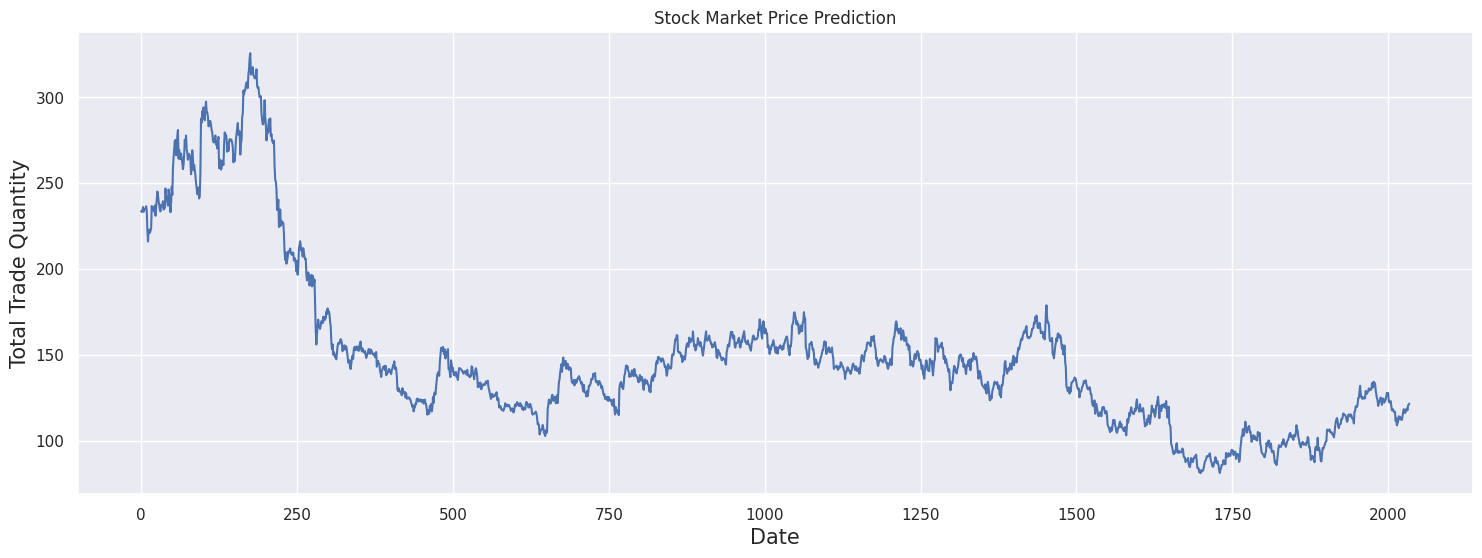

In [225]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Trade Quantity', fontsize=15)
plt.show()

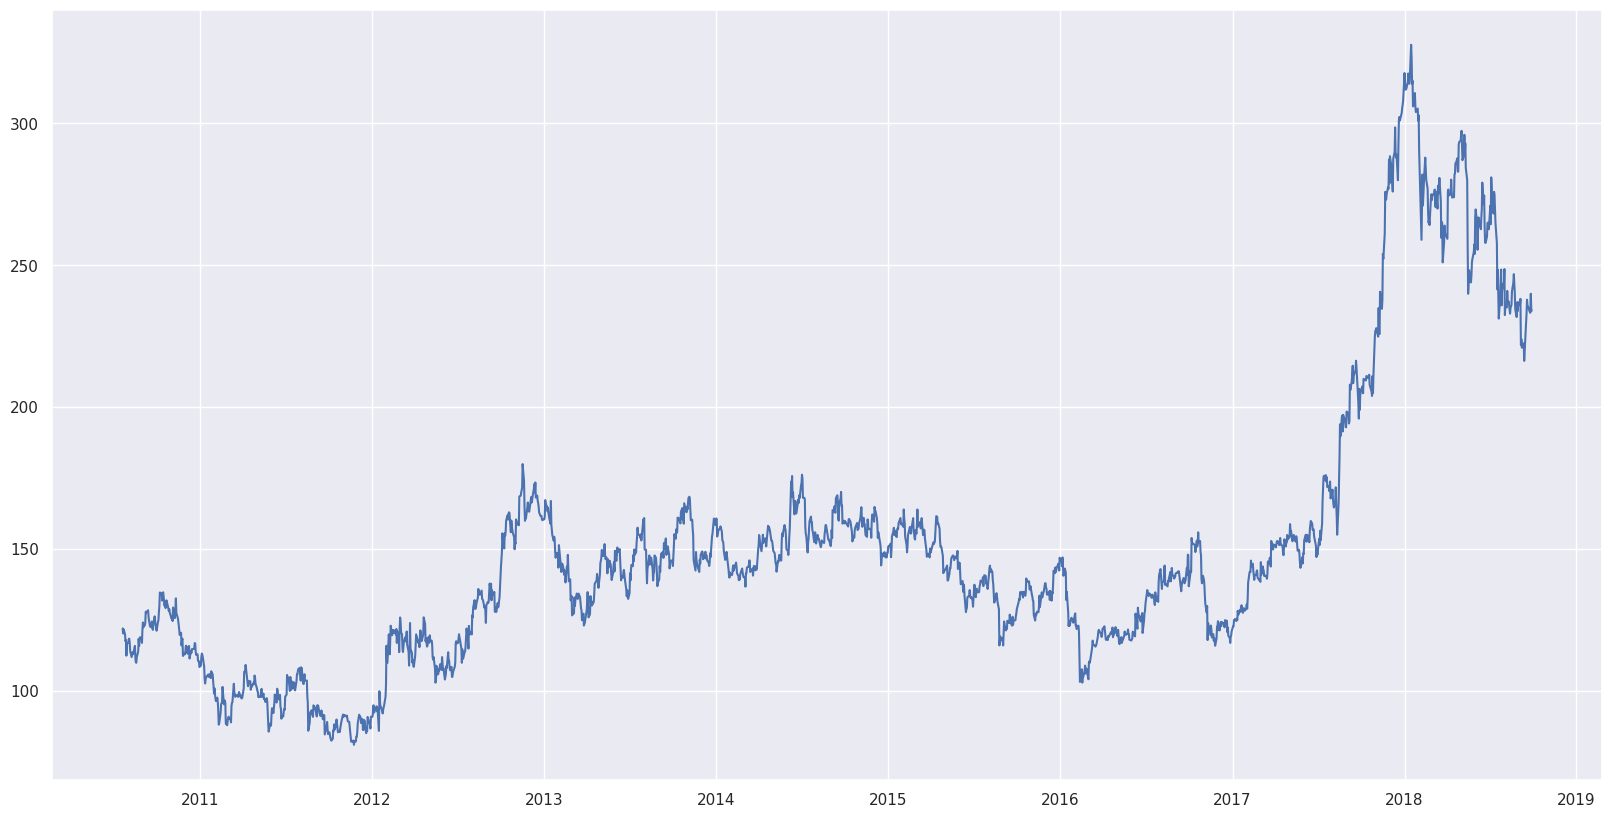

In [226]:
df["Date"] = pd.to_datetime(df.Date)
df.index = df['Date']

plt.figure(figsize=(20, 10))
plt.plot(df["Open"], label='ClosePriceHist')

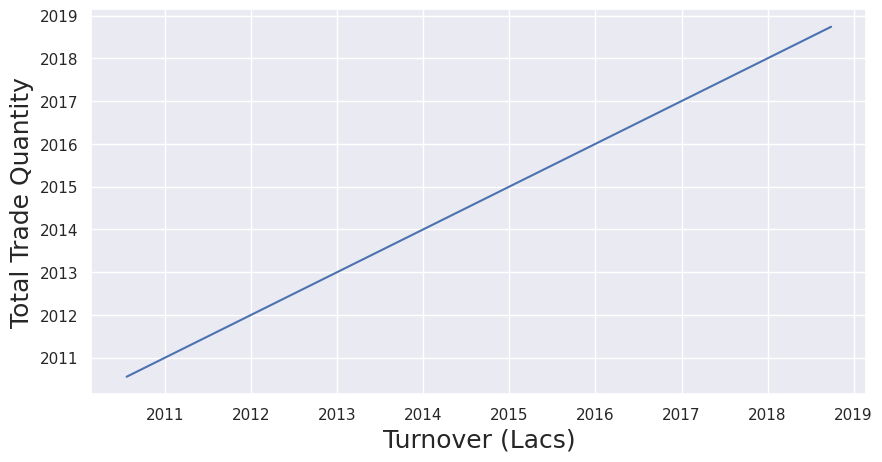

In [227]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

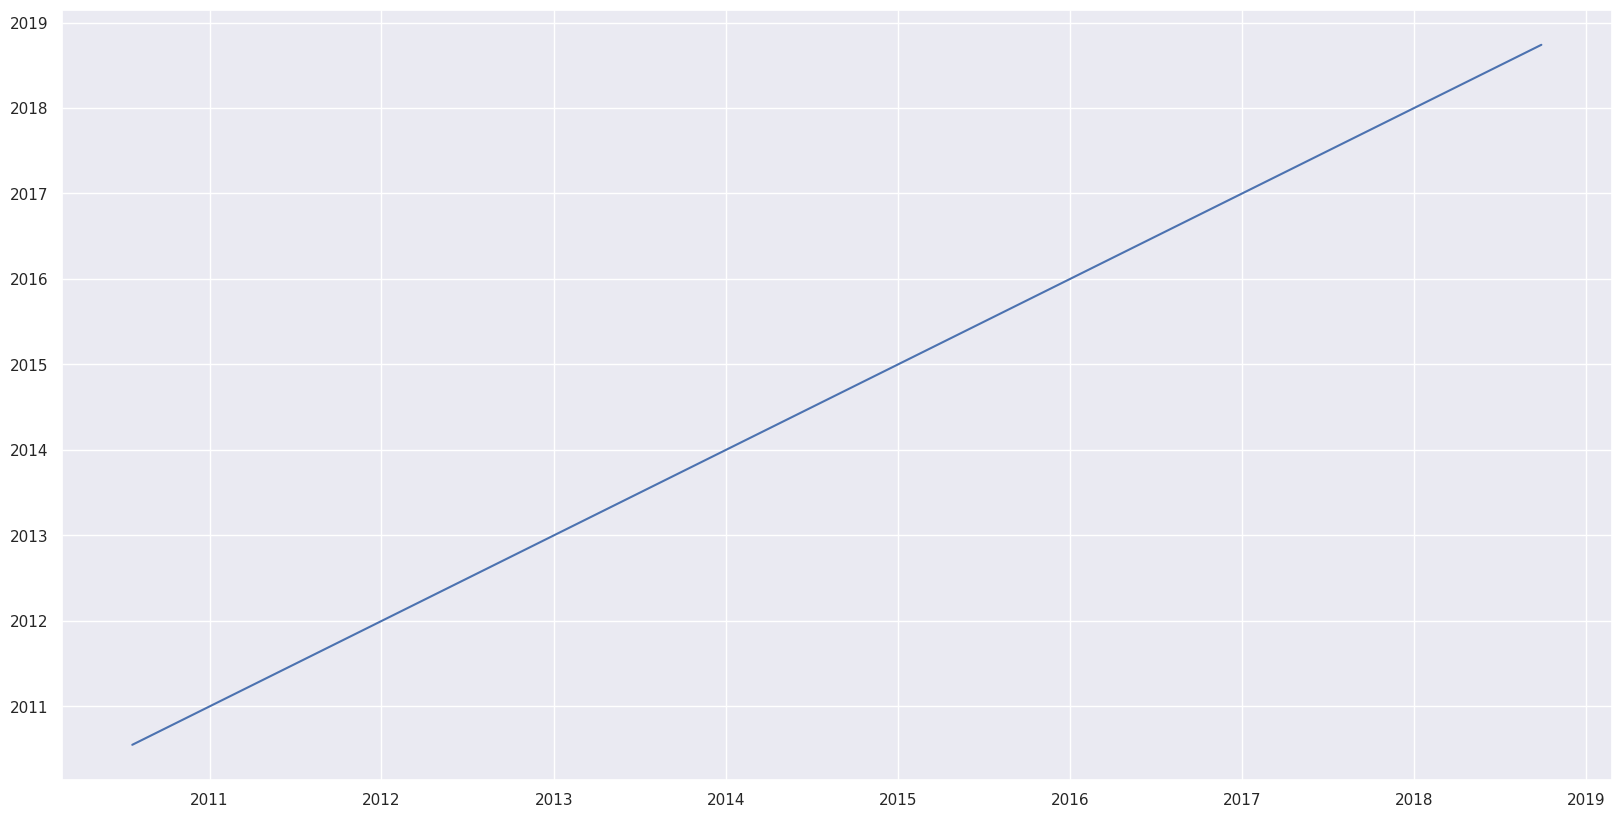

In [228]:
df["Turnover (Lacs)"] = pd.to_datetime(df.Date)
df.index = df['Turnover (Lacs)']

plt.figure(figsize=(20, 10))
plt.plot(df["Turnover (Lacs)"], label='ClosePriceHist')

<Axes: xlabel='Turnover (Lacs)'>

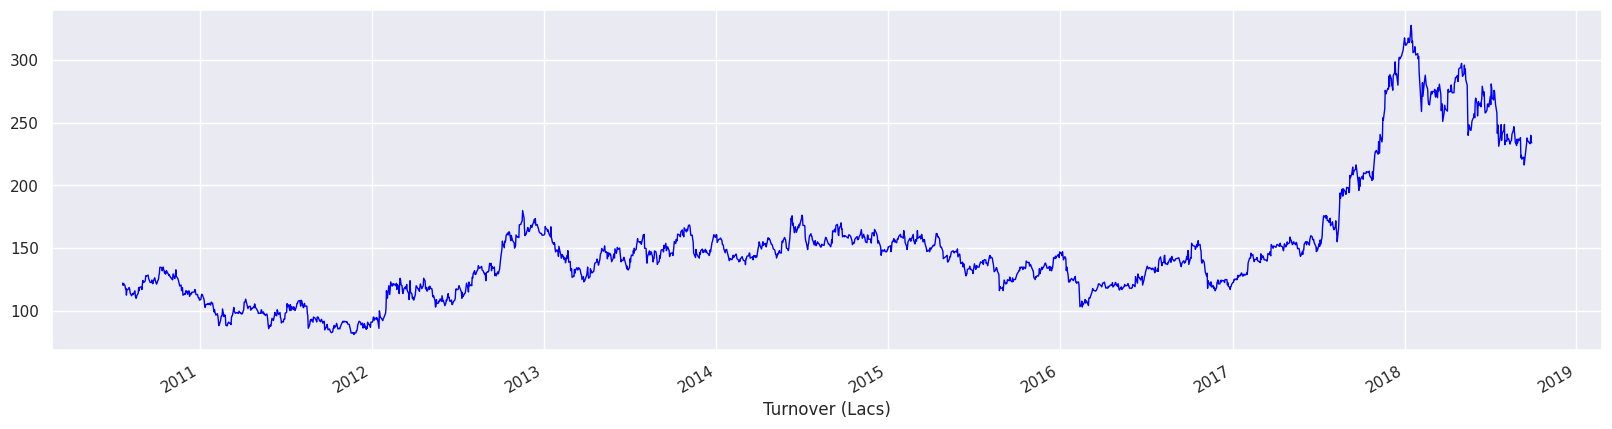

In [229]:
sns.set(rc = {'figure.figsize': (20, 5)})
df['Open'].plot(linewidth = 1,color='blue')

In [230]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Turnover (Lacs)'], dtype='object')

In [231]:
df = pd.read_csv(dataset, parse_dates=True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


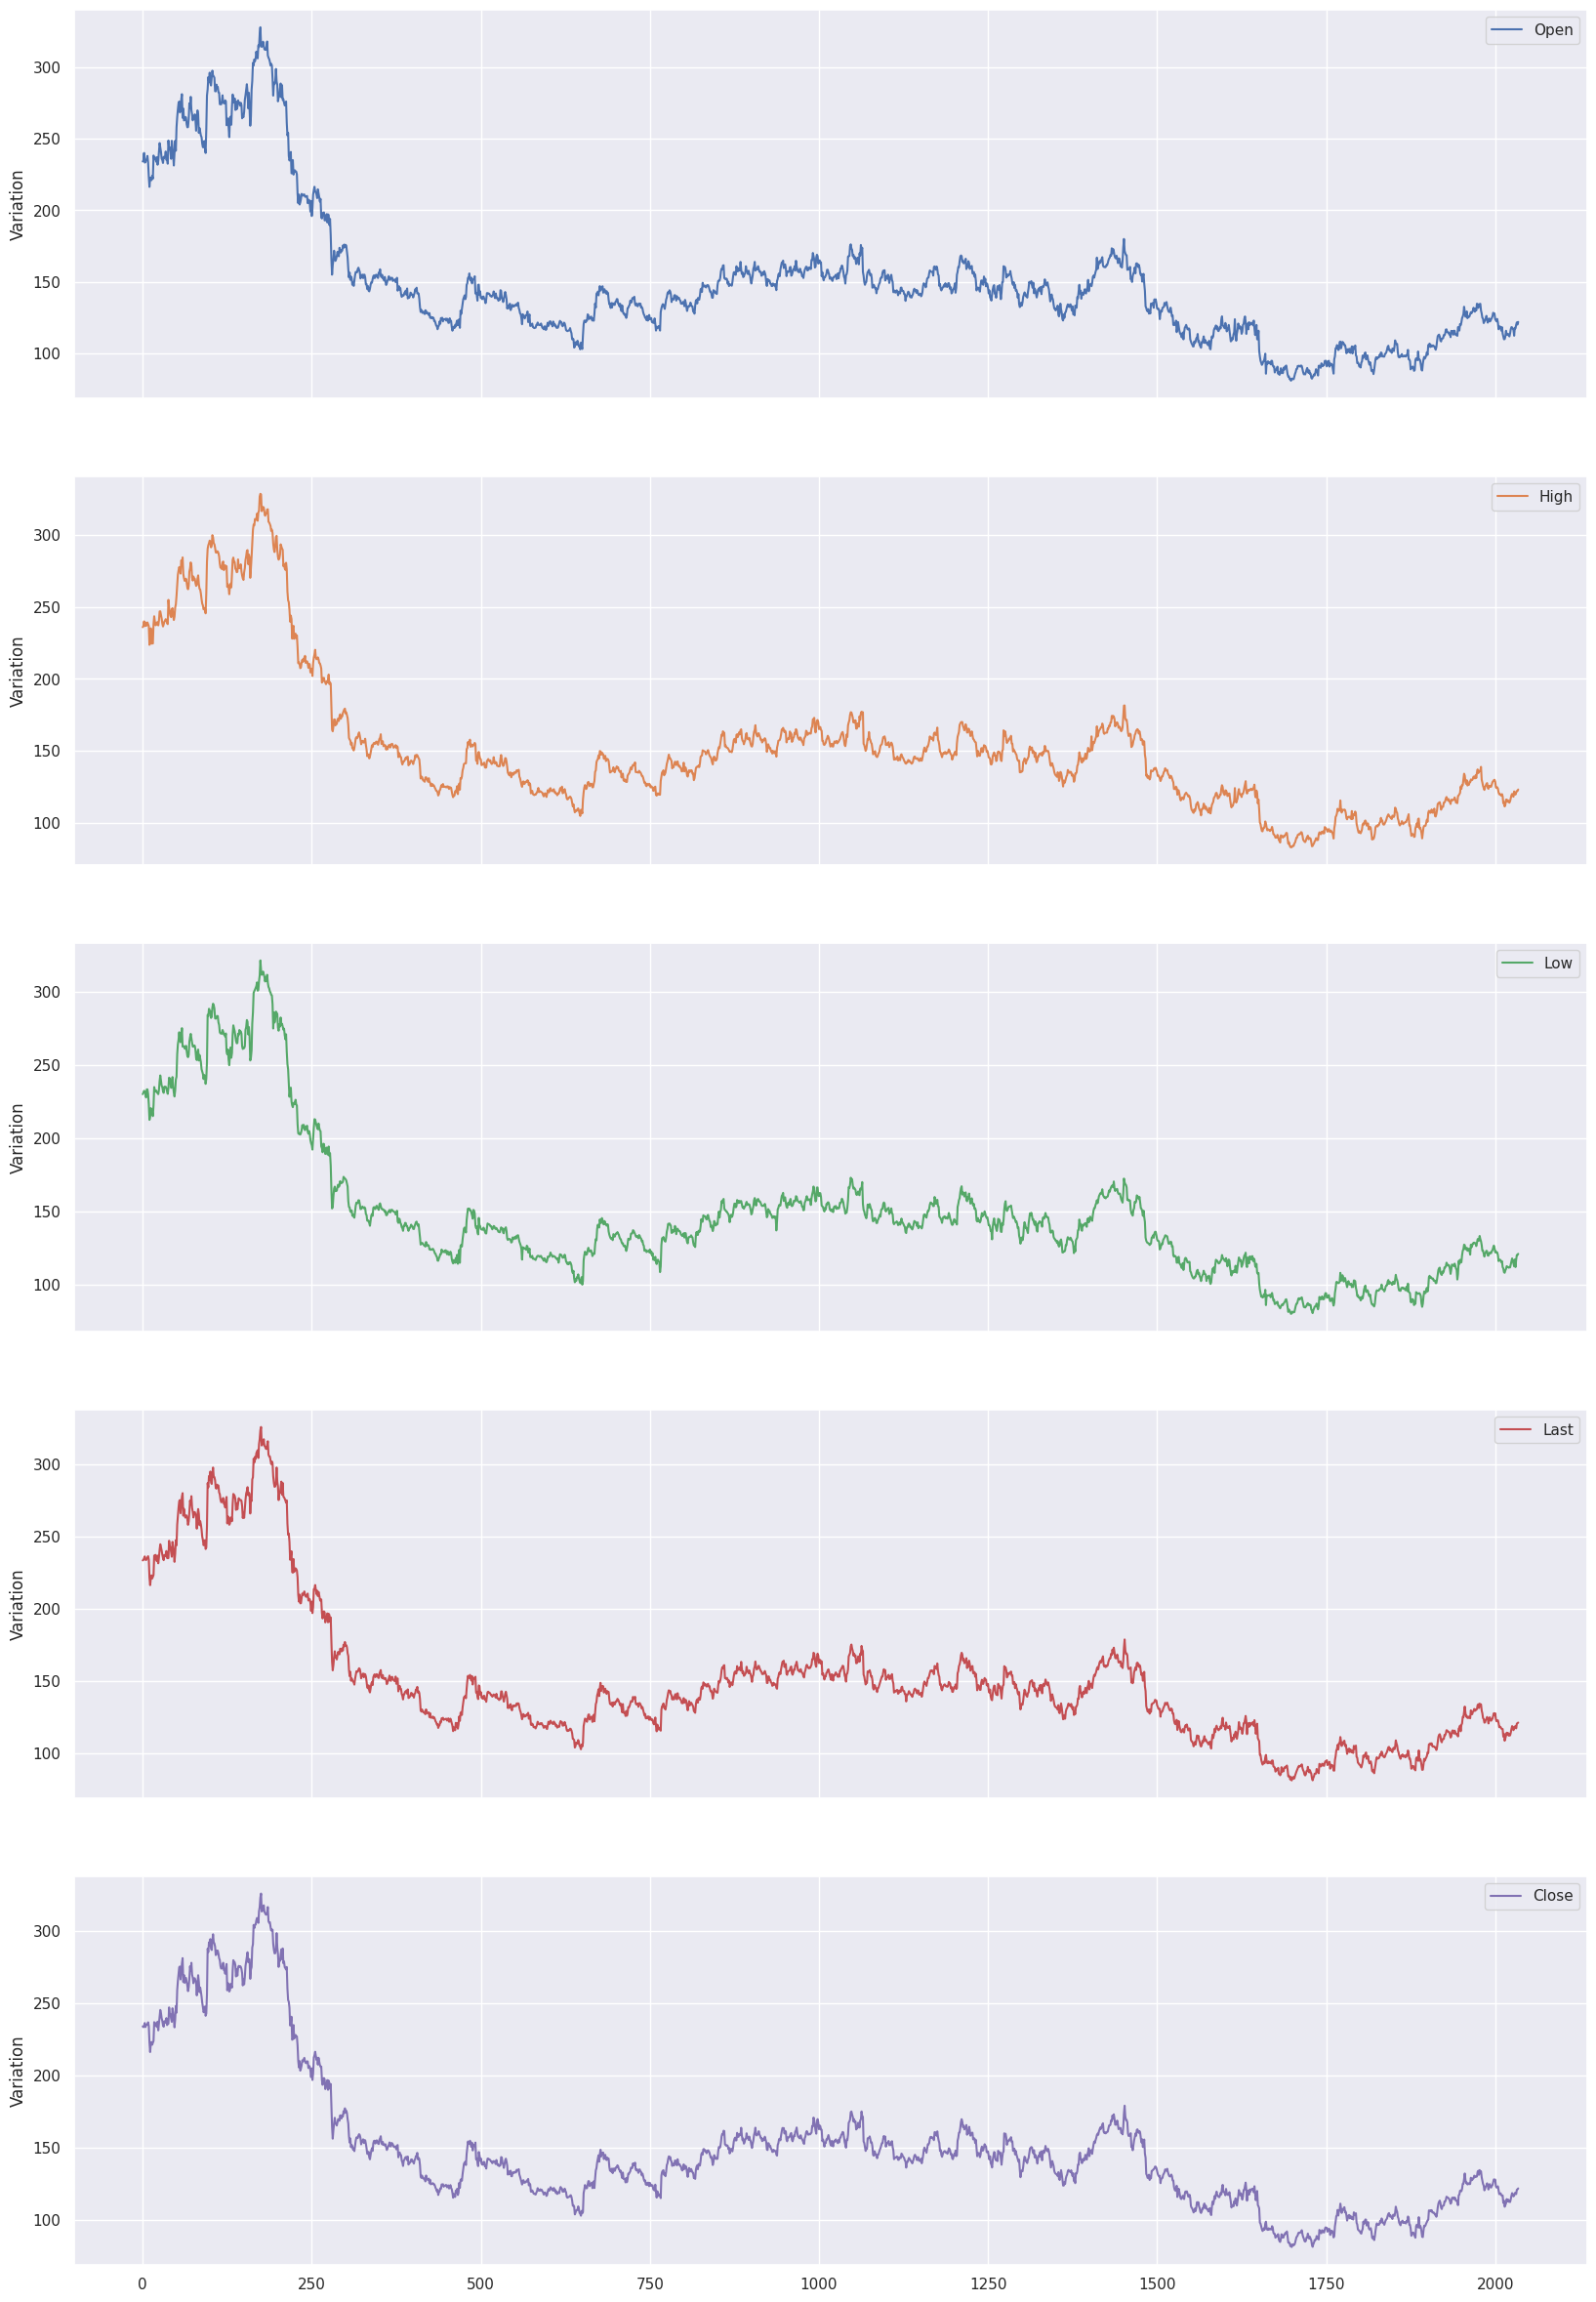

In [232]:
cols_plot = ['Open','High','Low','Last','Close']
axes = df[cols_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')